# Dimensionality reduction Techniques

Kĩ thuật dimensional reduction hay (kĩ thuật giảm chiều dữ liệu) có ưu điểm
- Cải thiện độ chính xác của model do giảm thiểu dữ liệu dư thừa
- Model huấn luyện nhanh hơn do dimension đã giảm và giảm tài nguyên sử dụng tính toán
- Kết quả của mô hình có thể dược phân tích dễ dàng hơn
- Giảm overfitting trong nhiều trường hợp. (Nhiều feature trong dữ liệu, mô      hình trở nên phức tạp và có xu hướng overfit trên tập huấn luyện)
- Dễ dàng hơn trong việc visualize dữ liệu (Đa cộng tuyến tính)

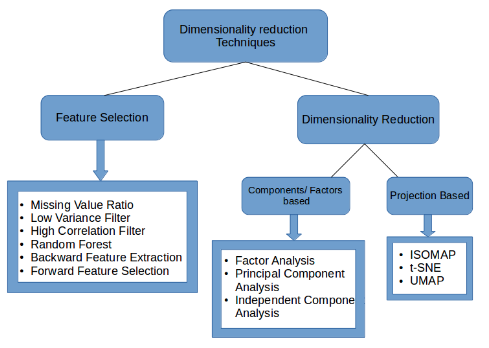

Dimensionality Reduction Techniques được chia thành hai hướng
+ Feature Selection: lựa chọn và dữ lại các feature tốt
+ Feature Extraction (Dimensionality Reduction): Giảm chiều dữ liệu bằng các kết hợp các feature đang có. 


## Principal component analysis (PCA) 
Đây là một thuật toán unsupervised giúp giảm chiều dữ liệu và vẫn giữ đc nhiều thông tin nhất có thể. Thường được với kiểu dữ liệu liner.

PCA là thuật toán giảm chiều tuyến tính bằng cách biến đổi các biến tương quan (p) trở thành các biến k không ràng buộc (với k<P) được gọi là principal components. Các biến này sẽ tốt đa hóa việc lưu giữ nhiều thông tin của tập dữ liệu nguồn.

- Một Principal component là tổ hợp tuyến tính của các biến
- Các pricipal component được tạo thành với mục tiêu:
    + First Principal component cố gắng biểu diễn phương sai lớn nhất của dữ liệu. Trong đó xác định hướng biến đổi lớn nhất của dữ liệu. Biến đổi càng lớn thì lượng thông ti component biểu diễn được càng nhiều.
    + Second Principal component sẽ cho thấy phương sai còn lại của tập dữ liệu và không tương quan với PC1 (hay correlation bằng 0) là vì thế hướng của 2 PC sẽ trực giao
    + các Principal component 3 vs 4 tiếp theo tương tự
    

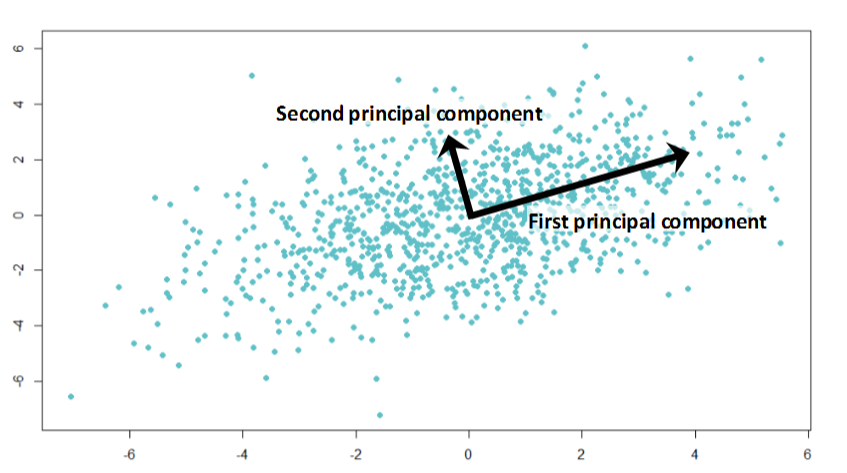

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()


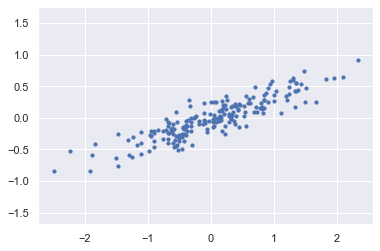

In [32]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1], s=10)
plt.axis('equal')
plt.show()

tìm hiểu mối quan hệ giữa x và y

In [33]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) # n_componets là số lượng thành phần cần giữ
pca.fit(X)

PCA(n_components=2)

In [34]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [35]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


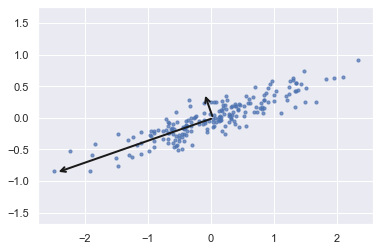

In [46]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                     linewidth=2,
                     color='k')
    ax.annotate('',v1, v0, arrowprops=arrowprops)

plt.scatter(X[:,0], X[:,1], s=10, alpha=0.7)
for length, vector in zip(pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal')
plt.show()

### PCA as dimensionality reduction


In [48]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape: ', X.shape)
print('transformed shape: ',X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


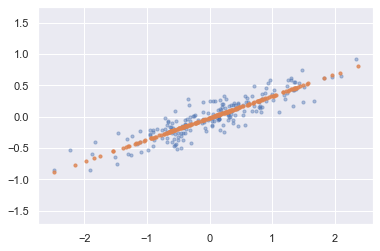

In [49]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1], alpha=0.4, s=10)
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.8, s=10)
plt.axis('equal')
plt.show()

# Correlation Matrix
Ma trận tương quan, cũng giống với ma trận hiệp phương sai, ma trận tương quan là một bảng hệ số tương quan giữa các biến khi ta có nhiều hơn hai biến trong bộ dữ liệu. Mỗi ô trong bảng hiển thị mối tương quan giữa hai biến. 

## Correlation coefficient
Hệ số tương quan là chỉ số do lường mức độ mạnh yếu của mối quan hệ giữa hai biến số, có giá trị từ -1.0 đến 1.0. 
- Hệ số tương quan có giá trị âm cho thấy 2 biến có mối quan hệ nghịch biến hoặc tương quan âm (nghịch tuyệt đối thì = -1 )
- Dương thì ngược lại
- Bằng 0 thì hai biến không phụ thuộc nhau

# Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Wine.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [5]:
X[:3]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_test[:2]

array([[ 0.93884707, -0.63216607, -0.4350103 , -0.91969562,  1.26324041,
         0.55999863,  0.97775416, -1.20637533,  0.02366802,  0.3392847 ,
        -0.1455748 ,  0.85229541,  1.04940526],
       [-0.24226334,  0.26757916,  0.42085937,  0.7127641 ,  0.84067236,
        -1.27747161, -0.60582812, -0.9706341 , -0.5873972 ,  2.42611713,
        -2.06608025, -1.55017035, -0.86659858]])

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
 #training the Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

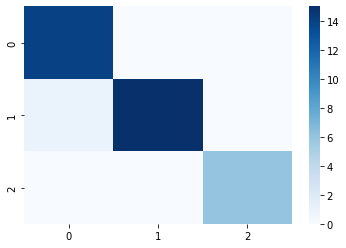

In [14]:
import seaborn as sns
ax = sns.heatmap(cm, fmt='', cmap='Blues')
plt.show()